# Washoe Tourism Impact

---
## Sources and Links

Dataset : [NevadaTomrrow.org](https://www.nevadatomorrow.org/indicators/index/view?indicatorId=14201&localeId=1813)

---
## Overview

- title
- sources and links
- imports
- business understanding
- methodoligy
- functions
- exploritory data analysis

---
## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('indicator_data_download_20250626.csv')

---
## Business Understanding

---
## Methodoligy

---
## Functions

In [3]:
def totals_by_year(df, col, val):

    totals_by_year = {}

    for ind, row in df.iterrows():
        year = row[col]
        value = row[val]

        if year in totals_by_year:
            totals_by_year[year] += value
        else:
            totals_by_year[year] = value

    yearly_totals = pd.DataFrame(list(totals_by_year.items()), columns = ['year', 'value'])
    yearly_totals_ = yearly_totals.sort_values(by = 'year', ascending = True)
    
    fig, ax = plt.subplots()
    
    yearly_totals_.plot(x = 'year', y = 'value', kind = 'bar', ax = ax)

    ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))) # format labels

    ax.set_title(f'{val} Per Year')
    ax.set_ylabel('Value')
    
    return yearly_totals_

In [4]:
def get_year_avg(start, end, col, val, df):
    mask = (df[col] >= start) & (df[col] <= end)
    filter = df.loc[mask, val]

    return round(filter.mean(), 2)   

In [5]:
def get_yoy(start, end, col, val, df):
    mask = (df[col] >= start) & (df[col] <= end)
    filter = df.loc[mask].copy()

    filter.sort_values(col, inplace = True)
    filter.reset_index(drop = True, inplace = True)

    g_rate = []
    for i in range(1, len(filter)):
        prev_val = filter.loc[i - 1, val]
        curr_val = filter.loc[i, val]
        curr_year = filter.loc[i, col]

        if curr_year < start:
            continue

        if prev_val == 0:
            continue

        g = (curr_val - prev_val) / prev_val
        g_rate.append(g)
    if not g_rate:
        return None
    yoy = round(sum(g_rate) / len(g_rate), 3)
    yoy_p = round(yoy * 100, 2)

    return f'Between the years of {start} and {end}, the Year Over Year value is {yoy} or {yoy_p}%'

---
## Exploritory Data Alalysis (EDA)

In [6]:
df.head()

,Indicator Name,What Is This Indicator,Location Type,Location,Indicator Rate Value,Indicator Rate Value Units,Rate Lower Confidence Interval,Rate Upper Confidence Interval,Indicator Count Value,Indicator Count Value Units,...,Breakout Rate Value,Breakout Rate Value Units,Breakout Rate Lower Confidence Interval,Breakout Rate Upper Confidence Interval,Breakout Count Value,Breakout Count Value Units,Breakout Count Lower Confidence Interval,Breakout Count Upper Confidence Interval,Breakout Unstable,Breakout Footer
0,Tourism Economic Impact,The economic impact of visitor spending activi...,County,Washoe,3325.1,Million Dollars,NaN,NaN,NaN,NaN,...,556.7,Million Dollars,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,Tourism Economic Impact,The economic impact of visitor spending activi...,County,Washoe,3325.1,Million Dollars,NaN,NaN,NaN,NaN,...,717.1,Million Dollars,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,Tourism Economic Impact,The economic impact of visitor spending activi...,County,Washoe,3325.1,Million Dollars,NaN,NaN,NaN,NaN,...,550.0,Million Dollars,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,Tourism Economic Impact,The economic impact of visitor spending activi...,County,Washoe,3325.1,Million Dollars,NaN,NaN,NaN,NaN,...,497.5,Million Dollars,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
4,Tourism Economic Impact,The economic impact of visitor spending activi...,County,Washoe,3325.1,Million Dollars,NaN,NaN,NaN,NaN,...,616.2,Million Dollars,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Indicator Name                            25 non-null     object 
 1   What Is This Indicator                    25 non-null     object 
 2   Location Type                             25 non-null     object 
 3   Location                                  25 non-null     object 
 4   Indicator Rate Value                      25 non-null     float64
 5   Indicator Rate Value Units                25 non-null     object 
 6   Rate Lower Confidence Interval            0 non-null      float64
 7   Rate Upper Confidence Interval            0 non-null      float64
 8   Indicator Count Value                     0 non-null      float64
 9   Indicator Count Value Units               0 non-null      float64
 10  Count Lower Confidence Interval         

In [17]:
df['What Is This Indicator'].value_counts()

What Is This Indicator
The economic impact of visitor spending activities, including transport, retail, food and beverage, recreation, gaming, and lodging that ultimately increase tax revenues.    25
Name: count, dtype: int64

In [8]:
df['Indicator Name'].value_counts()

Indicator Name
Tourism Economic Impact    25
Name: count, dtype: int64

In [9]:
df['Indicator Rate Value Units'].value_counts()

Indicator Rate Value Units
Million Dollars    25
Name: count, dtype: int64

In [10]:
df['Breakout Subcategory'].head()

0    Food & beverage
1             Gaming
2            Lodging
3         Recreation
4             Retail
Name: Breakout Subcategory, dtype: object

In [11]:
df['Period of Measure'].value_counts()

Period of Measure
2023    6
2022    6
2021    6
2020    1
2019    1
2018    1
2017    1
2016    1
2015    1
2014    1
Name: count, dtype: int64

## Trends and Growth

,year,value
9,2014,2428.4
8,2015,2547.6
7,2016,2662.2
6,2017,2747.6
5,2018,2831.4
4,2019,2925.5
3,2020,1919.1
2,2021,17032.8
1,2022,18787.2
0,2023,19950.6


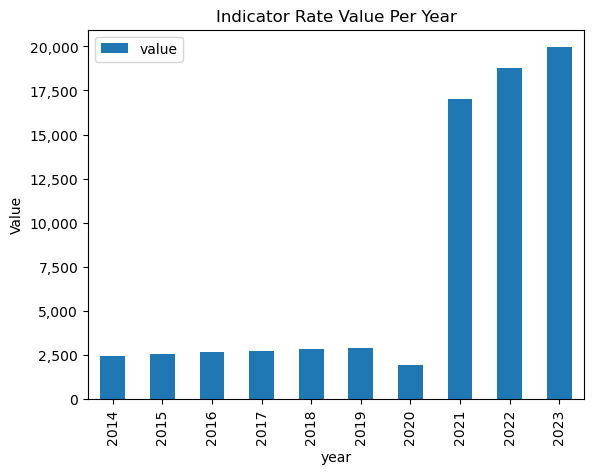

In [12]:
totals_by_year(df, 'Period of Measure', 'Indicator Rate Value')

This plot paints a counterintuitive picture, with spending showing an increas of value duing the pandemic. While this makes sense for markets such as gaming (non casino gambling) due to people staying home and buying more games to pass the time, this doesn't make sense for tourism, as COVID-19 decimated tourism all throughout the world. This data could include indirect economic impact as well as delayed reporting from casinos and hotels as well as stimulus driven spending. This realization would require further data and research to come to a conclusion. 

In [13]:
get_year_avg(2014, 2019, 'Period of Measure', 'Indicator Rate Value', df)

2690.45

In [18]:
get_year_avg(2019, 2020, 'Period of Measure', 'Indicator Rate Value', df)

2422.3

In [20]:
get_year_avg(2021, 2023, 'Period of Measure', 'Indicator Rate Value', df)

3098.37

Here we can see the average spending across the years, with the average spending from 2014 to 2019 being 2690.45, with a drop in 2019 to 2020, and the major increase duing the pandemic up to 3098.37.

In [14]:
get_yoy(2014, 2019, 'Period of Measure', 'Indicator Rate Value', df)

'Between the years of 2014 and 2019, the Year Over Year value is 0.038 or 3.8%'

In [15]:
get_yoy(2020, 2021, 'Period of Measure', 'Indicator Rate Value', df)

'Between the years of 2020 and 2021, the Year Over Year value is 0.08 or 8.0%'

Year Over Year compares data from one time frame to another, giving insight into performance gains or losses. From 2014 to 2019, there was a YoY increase of 3.8%, with a huge increase of 8% from 2020 to 2021.

## Spending per Category

In [22]:
df['Breakout Subcategory'].value_counts()

Breakout Subcategory
Food & beverage    3
Gaming             3
Lodging            3
Recreation         3
Retail             3
Transport          3
Name: count, dtype: int64

In [ ]:
for ind, row in df.iterrows():
    count = {}
    